## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


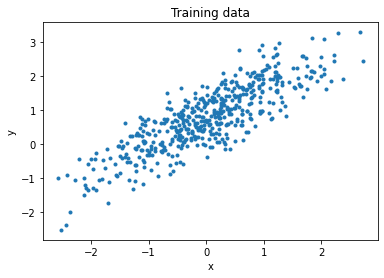

In [3]:
#path = "/content/drive/MyDrive/Image_recognition/HW1/train_data.csv"
path = "train_data.csv"
data = np.genfromtxt(path, delimiter=',', dtype=None,
                     names=('x_train', 'y_train'), skip_header=1, encoding='UTF-8')
x_train, y_train = data['x_train'], data['y_train']

plt.figure('Training data')
plt.title('Training data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_train, y_train, '.')
plt.show()

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [4]:
class Linear_Regression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.b = [0, 0] # y=ax+b, a=b[0], b=b[1]
        self.loss = [0, 0] # y=ax+b, loss of a、b
     
    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        self.loss[0] = np.mean(Y_pred - self.Y) # compute the loss of b[0]
        self.b[0] = self.b[0] - learning_rate * self.loss[0] # Gradient descent for b[0]
        self.loss[1] = np.mean((Y_pred - self.Y) * self.X) # compute the loss of b[1]
        self.b[1] = self.b[1] - learning_rate * self.loss[1] # Gradient descent for b[1]
 
    def predict(self, X=[]):
        Y_pred = np.array([])
        if X == []: X = self.X # if training => X = self.X; if testing => X = X
        for x in X:
            Y_pred = np.append(Y_pred, self.b[0] + (self.b[1] * x))
        return Y_pred

def get_MSE(Y, Y_pred):
    return np.mean( (Y_pred - Y) ** 2 )

def plot_regression_line(X, Y, Y_pred, fig):
    plt.figure(fig)
    plt.scatter(X, Y, color='b', s=10)
    plt.plot(X, Y_pred, color='r', label = 'Regression Line')
    plt.title(fig)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

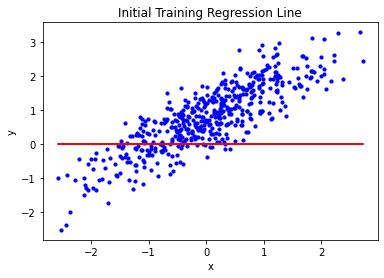

step =   100 | MSE = 0.44136 | Regression: y = 0.504 + 0.518 * x
step =   200 | MSE = 0.29026 | Regression: y = 0.684 + 0.708 * x
step =   300 | MSE = 0.27038 | Regression: y = 0.749 + 0.777 * x
step =   400 | MSE = 0.26776 | Regression: y = 0.772 + 0.803 * x
step =   500 | MSE = 0.26742 | Regression: y = 0.780 + 0.812 * x
step =   600 | MSE = 0.26737 | Regression: y = 0.783 + 0.816 * x
step =   700 | MSE = 0.26736 | Regression: y = 0.784 + 0.817 * x
step =   800 | MSE = 0.26736 | Regression: y = 0.784 + 0.818 * x
step =   900 | MSE = 0.26736 | Regression: y = 0.784 + 0.818 * x
step =  1000 | MSE = 0.26736 | Regression: y = 0.785 + 0.818 * x
weight =  0.8179331278291383
intercept =  0.7845389075277833


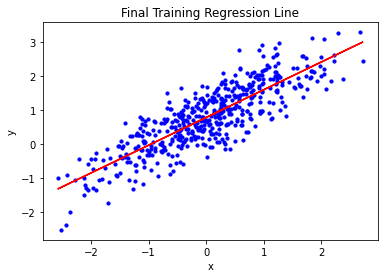

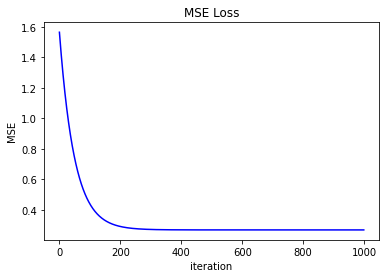

In [5]:
regressor = Linear_Regression(x_train, y_train)
iteration = 0
iteration_max = 1000
learning_rate = 0.01
mse_all = []

y_pred = regressor.predict()
plot_regression_line(x_train, y_train, y_pred, 'Initial Training Regression Line')
     
while 1:
    y_pred = regressor.predict()
    regressor.update_coeffs(learning_rate)
    mse_all.append(get_MSE(y_train, y_pred))
    iteration += 1
    if iteration % 100 == 0:
        mse = get_MSE(y_train, y_pred)
        print('step = %5d | MSE = %.5f | Regression: y = %.3f + %.3f * x' %(iteration, mse, regressor.b[0], regressor.b[1]))
    if iteration % iteration_max == 0:
        #if input("Do you want to stop (y/*)??") == "y":
            print('weight = ', regressor.b[1])
            print('intercept = ', regressor.b[0])
            break

# Final Training Regression Line
plot_regression_line(x_train, y_train, y_pred, 'Final Training Regression Line')

# Loss on training set
plt.figure('MSE Loss')
plt.plot(range(iteration), mse_all, color='b')
plt.title('MSE Loss')
plt.xlabel('iteration')
plt.ylabel('MSE')
plt.show()

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

In [6]:
#path = "/content/drive/MyDrive/Image_recognition/HW1/test_data.csv"
path = "test_data.csv"
test_data = np.genfromtxt(path, delimiter=',', dtype=None,
                     names=('x_test', 'y_test'), skip_header=1, encoding='UTF-8')
x_test, y_test = test_data['x_test'], test_data['y_test']

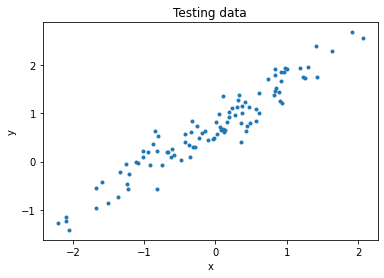

In [7]:
plt.figure('Testing data')
plt.plot(x_test, y_test, '.')
plt.title('Testing data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Final testing data MSE =  0.068705834617267


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


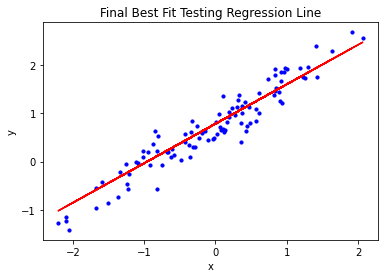

In [8]:
y_pred = regressor.predict(x_test)
print('Final testing data MSE = ',get_MSE(y_test, y_pred))
plot_regression_line(x_test, y_test, y_pred, 'Final Best Fit Testing Regression Line')